# Temporal and spatial analysis of ssh data (satellite, smt, r2b8)

In [1]:
import warnings
warnings.filterwarnings('ignore')  #suppress some warnings about future code changes

import pandas as pd
import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html
#import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
from scipy import stats    #Used for 2D binned statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable #For plotting interior colobars
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import pyicon as pyic
import glob, os        
#import spectrum

#from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 


-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


## aviso ssh data

In [2]:
path_data = '/pool/data/ICDC/ocean/aviso_ssh/DATA/2010/'
fname = 'dt_global_twosat_phy_l4_20191228_vDT2018.nc' #last
#### flist
search_str = f'dt_global_twosat_phy_l4_*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()
flist = flist[:90]

ds = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
longi = ds.longitude - 360 #cheap fix since NA is focus region
ds = ds.assign_coords(longitude = longi)
ds

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -359.9 -359.6 -359.4 ... -0.625 -0.375 -0.125
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

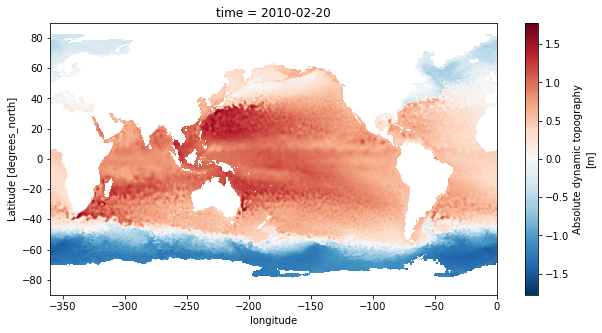

In [3]:
ds.isel(time=50).adt.plot(figsize=(10,5))

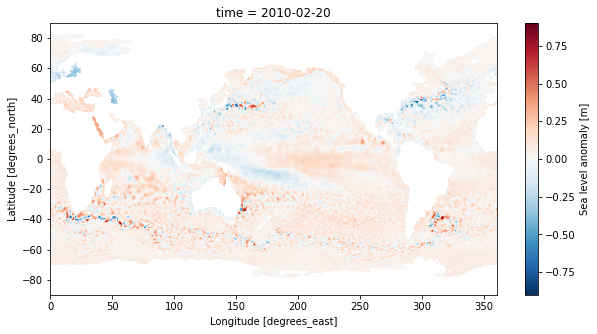

In [12]:
ds.isel(time=50).sla.plot(figsize=(10,5))

In [4]:
lon = [-80, -30]
lat = [31.8, 32]
ds_section = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
ds_section

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 1, longitude: 200, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 31.88
  * longitude  (longitude) float32 -79.88 -79.62 -79.38 ... -30.62 -30.38 -30.12
  * nv         (nv) int32 0 1
Data variables:
    crs        (time, latitude, longitude) float64 -2.147e+09 ... -2.147e+09
    lat_bnds   (time, latitude, nv, longitude) float32 dask.array<chunksize=(1, 1, 2, 200), meta=np.ndarray>
    lon_bnds   (time, longitude, nv, latitude) float32 dask.array<chunksize=(1, 200, 2, 1), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

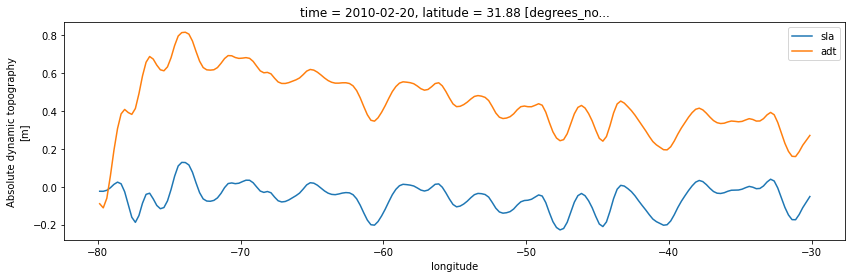

In [5]:
fig = plt.figure(figsize=(14,4))
ds_section.isel(time=50).sla.plot(label='sla')
ds_section.isel(time=50).adt.plot(label='adt')
plt.legend()

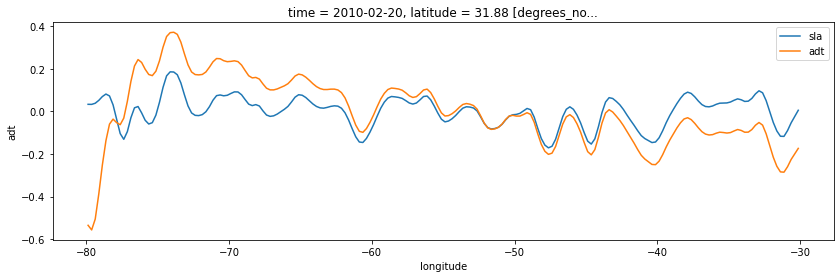

In [6]:
fig = plt.figure(figsize=(14,4))
slam = ds_section.isel(time=50).sla - ds_section.isel(time=50).sla.mean()
slam.plot(label='sla')
adtm = ds_section.isel(time=50).adt - ds_section.isel(time=50).adt.mean()
adtm.plot(label='adt')
plt.legend()
plt.savefig('../images/adt_sla_mmean')

adt = sla + mdt >> the figure shows a longitude dependence of mdt,
in costal region mdt seems to change differently

In [7]:
lon = [-60.25, -60]
lat = [40, 40.25]
ds_loc = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
ds_loc

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 1, longitude: 1, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 40.12
  * longitude  (longitude) float32 -60.12
  * nv         (nv) int32 0 1
Data variables:
    crs        (time, latitude, longitude) float64 -2.147e+09 ... -2.147e+09
    lat_bnds   (time, latitude, nv, longitude) float32 dask.array<chunksize=(1, 1, 2, 1), meta=np.ndarray>
    lon_bnds   (time, longitude, nv, latitude) float32 dask.array<chunksize=(1, 1, 2, 1), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

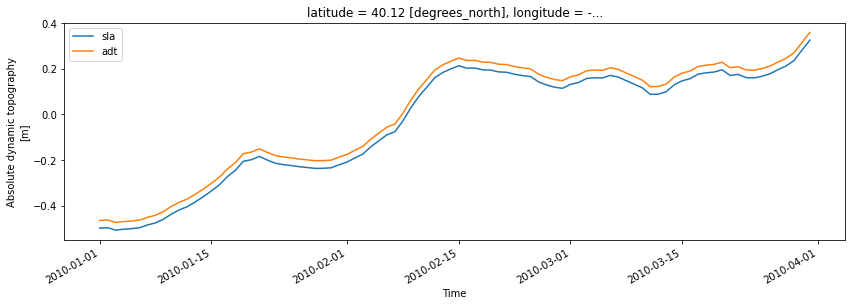

In [8]:
fig = plt.figure(figsize=(14,4))
ds_loc.sla.plot(label='sla')
ds_loc.adt.plot(label='adt')
plt.legend()

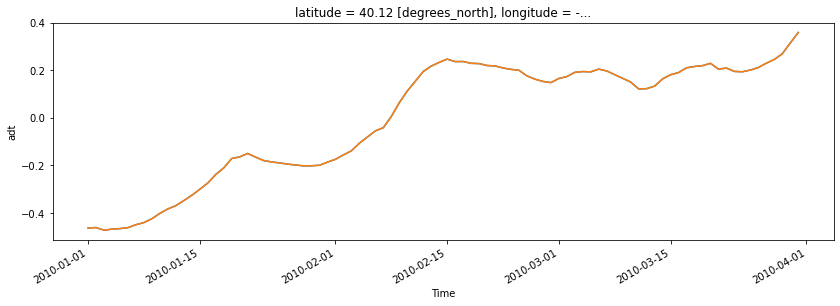

In [9]:
fig = plt.figure(figsize=(14,4))
slatm = ds_loc.sla - ds_loc.sla.mean()
slatm.plot(label='sla')
adttm = ds_loc.adt - ds_loc.adt.mean()
adttm.plot(label='adt')

at a fixed location adt and sla seem to be seperated by a fixed value

## FFT

spatial analysis

In [10]:
#choose time
ds_section.time[50]

<xarray.DataArray 'time' ()>
array('2010-02-20T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-02-20
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

In [11]:
# convert to meter
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

distance of one degree in meter at equator 111194.92664455873
distance of one degree in meter at section 93927.02124530253


In [12]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

23481.755311325633


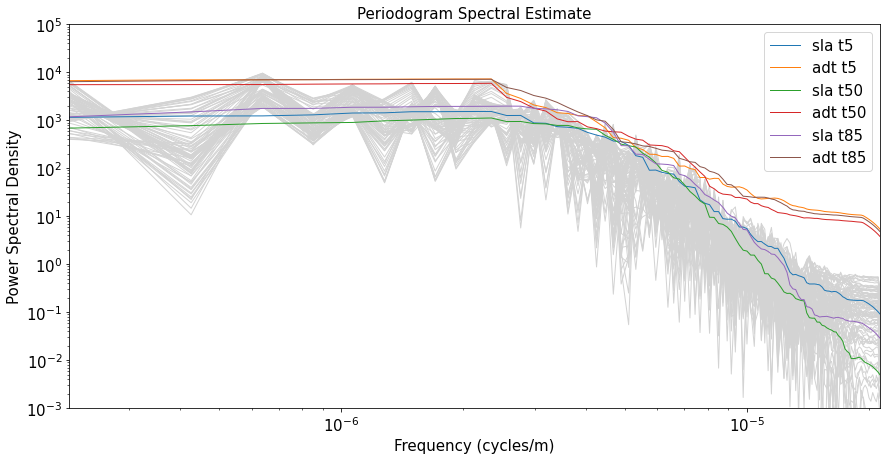

In [30]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
N = 260
dm_sat = (ds_section.longitude[1] - ds_section.longitude[0]) * delta[const_lat]
dm_sat = dm_sat.data
print(dm_sat)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for i in np.arange(90):
    y = ds_section.isel(time=i).sla
    # satellite
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color="lightgrey")

y = ds_section.isel(time=5).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='sla t5')

y = ds_section.isel(time=5).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='adt t5')

y = ds_section.isel(time=50).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='sla t50')

y = ds_section.isel(time=50).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='adt t50')

y = ds_section.isel(time=85).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='sla t85')

y = ds_section.isel(time=85).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='adt t85')
    
ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-3, 1e5)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Frequency (cycles/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram Spectral Estimate',fontsize=15);
#plt.savefig('../images/fft_ssh_spat', bbox_inches='tight')

### load ssh data from smt model

In [13]:
run      = 'ngSMT_tke'
gname = 'smt'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'

path_grid        = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree     = f'{path_grid}ckdtree/'
fpath_ckdtree    = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [14]:
search_str = f'_h_sp_*.nc' 
month = '01'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist1      = np.array(glob.glob(path_data+search_str))
flist1.sort()
month = '02'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist2      = np.array(glob.glob(path_data+search_str))
flist2.sort()
month = '03'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist3      = np.array(glob.glob(path_data+search_str))
flist3.sort()

flist = [*flist1, *flist2, *flist3]
flist.sort()

In [15]:
time0 = np.datetime64('2010-01-09T01:00:00')
dti = pd.date_range(time0, periods=984, freq="2h")
smt = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
smt = smt.assign_coords(time=dti)


In [16]:
from netCDF4 import Dataset, num2date
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
f = Dataset(fpath_tgrid, 'r')
clon = f.variables['clon'][:] * 180./np.pi # center longitude
clat = f.variables['clat'][:] * 180./np.pi # center latitude
f.close()

In [17]:
smt = smt.assign_coords({"clon": ("ncells", clon)})
smt = smt.assign_coords({"clat": ("ncells", clat)})

In [10]:

#sst_slice = smt.where((smt.clat > lat_reg[0]) & (smt.clat < lat_reg[1]) & (smt.clon > lon_reg[0]) & (smt.clon < lon_reg[1]), drop=True)

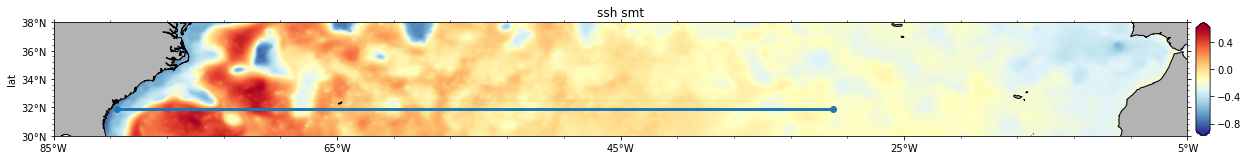

In [27]:
lon_reg = [-85, -5]
lat_reg = [30, 38]
t=50*12
hca, hcb = pyic.arrange_axes(1, 1, plot_cb=True, asp=0.1, fig_size_fac=1, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#lon, lat, data = pyic.interp_to_rectgrid(smt.isel(time=t).h_sp, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(lon, lat, data, ax=ax, cax=cax,  transform=ccrs_proj, rasterized=False)
lonl = -80.5, -30
latl = 31.9, 31.9
ax.plot(lonl, latl, transform=ccrs_proj, linewidth=3, marker='o', markersize=6)

ax.set_title('ssh smt')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

plt.savefig('../images/ssh_slice')

t = 42*12 #20th of february no hour specified
smt_sec = smt.time[t]
smt_sec = smt_sec.where((smt_sec.lat > lat[0]) & (smt_sec.lat < lat[1]) & (smt_sec.lon > smt_lon[0]) & (smt_sec.lon < smt_lon[1]), drop=True)

r = 6371000
const_lat = 40 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

In [18]:
res = 111000/600  # 1 degree in meter at equator divided by approx grid resolution at equator
npoints = np.abs(lon[1] - lon[0]) * res
print('points per degree', res, 'max approx points per section', npoints)

points per degree 185.0 max approx points per section 46.25


In [19]:
npoints = 5500

sname         = 'A'
tgname        = 'SMT'
gname         = 'OceanOnly_SubmesoNA_2500m_srtm30'
path_tgrid    = f'/pool/data/ICON/oes/grids/OceanOnly/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is stored

lon = -80.5, -30
lat = 31.9, 31.9

dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon[1],lat[0]], p2=[lon[0],lat[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/SMT_nps5500_30W31.9N_80.5W31.9N.npz


In [20]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(cell=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("cell", lon_sec)})
grid_smt = grid.assign_coords({"lat_sec": ("cell", lat_sec)})
# section distance
d_smt_sec = (grid_smt.lon_sec[0] - grid_smt.lon_sec[1]).data *delta[32]
d_smt_hi_res = grid_smt.min().data

print('max',grid_smt.max().data, 'min', grid_smt.min().data, 'distance section', d_smt_sec)

max 1053.208624249111 min 554.3990887684248 distance section 862.5776637366182


Text(0.5, 1.0, 'Resolution of Original grid and spacing of section sampling SMT')

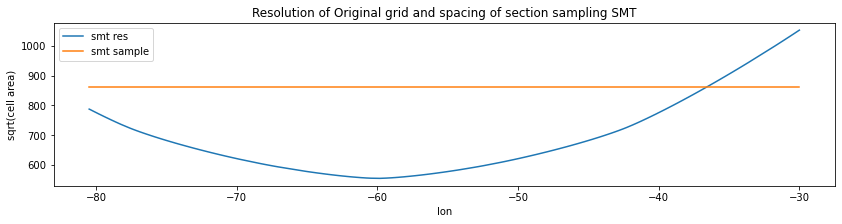

In [21]:
fig = plt.figure(figsize=(14,3))
grid_smt.plot(x="clon", label='smt res')
plt.plot(lon, ([d_smt_sec, d_smt_sec]), label='smt sample')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area)')
plt.legend()
plt.title('Resolution of Original grid and spacing of section sampling SMT')

In [22]:

smt_sec = smt.isel(ncells=ickdtree)
smt_sec = smt_sec.assign_coords({"clon": ("ncells", lon_sec)})

smt_sec = smt_sec.h_sp

In [23]:
(lon_sec[1]-lon_sec[0]) * delta[32]

-862.5776637366182

862.5776637366182


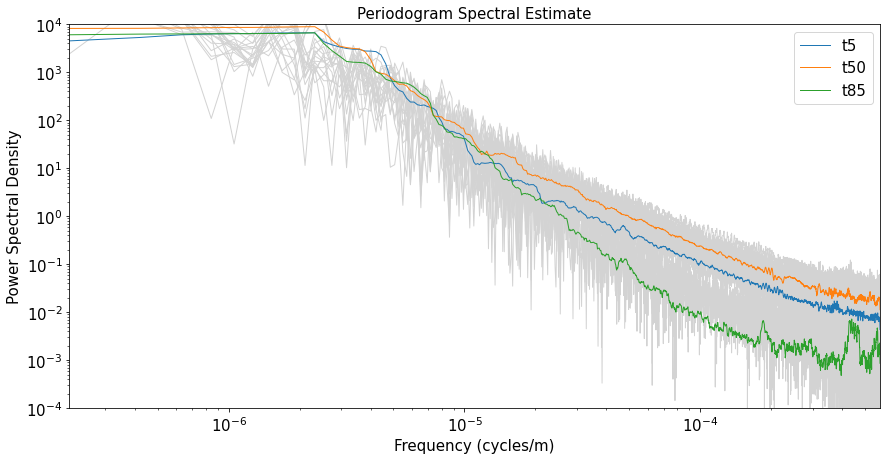

In [33]:
kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size

dm_smt = (smt_sec.clon[0]- smt_sec.clon[1]) * delta[32] #(ds_section.longitude[1] - ds_section.longitude[0]) * delta[const_lat]
dm_smt = dm_smt.data
print(dm_smt)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for i in np.arange(984)[0::50]:
    y = smt_sec.isel(time=i)
    # satellite
    cv = y.data.compute() #3month average
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  color="lightgrey")

y = smt_sec.isel(time=5*12)
# satellite
cv = y.data.compute() #3month average
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='t5')

y = smt_sec.isel(time=50*12)
# satellite
cv = y.data.compute() #3month average
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='t50')

y = smt_sec.isel(time=70*12)
# satellite
cv = y.data.compute() #3month average
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=1,  label='t85')
    
ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-4, 1e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Frequency (cycles/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram Spectral Estimate',fontsize=15);
#plt.savefig('../images/fft_ssh_spat', bbox_inches='tight')

In [34]:
S.shape

(2751,)

### Comparison

## simple evaluation

In [24]:
tsmt = 12*77

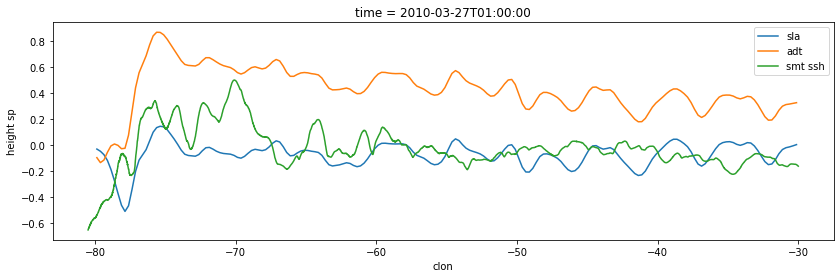

In [25]:
fig = plt.figure(figsize=(14,4))
ds_section.isel(time=85).sla.plot(label='sla')
ds_section.isel(time=85).adt.plot(label='adt')
smt_sec.isel(time=tsmt).plot(x="clon",label='smt ssh')
plt.legend()
plt.savefig('../images/ssh_space')

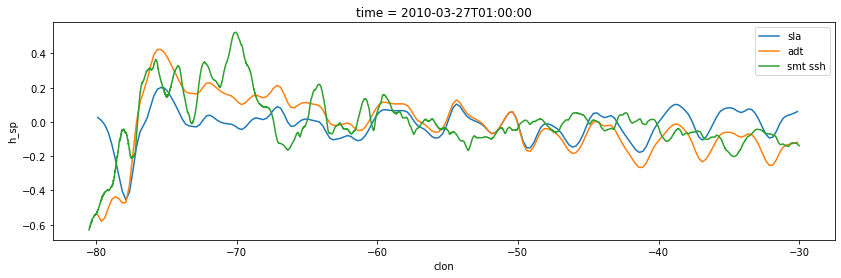

In [28]:
fig = plt.figure(figsize=(14,4))
slam = ds_section.isel(time=85).sla - ds_section.isel(time=50).sla.mean()
slam.plot(label='sla')
adtm = ds_section.isel(time=85).adt - ds_section.isel(time=50).adt.mean()
adtm.plot(label='adt')
smtm = smt_sec.isel(time=tsmt) - smt_sec.isel(time=tsmt).mean()
smtm.plot(x="clon", label='smt ssh')
plt.legend()

plt.savefig('../images/ssh_space_mean')

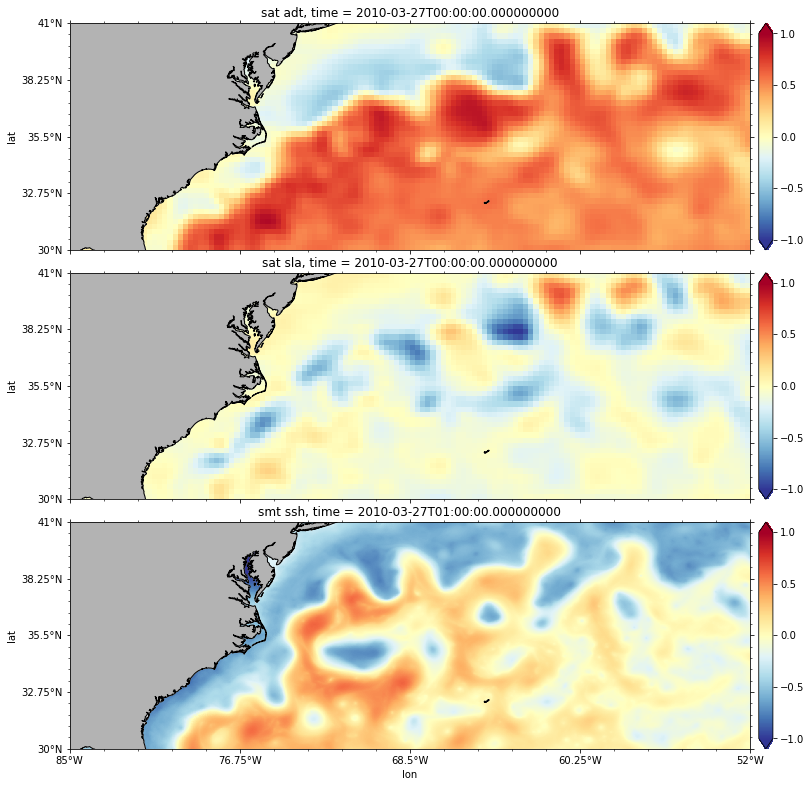

In [123]:
lon_reg = [-85, -52]
lat_reg = [30, 41]
lon = lon_reg
lat = lat_reg
clim = -1,1
clim1 = -0.5, 0.5
clim2 = -0.2, 0.2
tsmt = 12*77
tsat = 85

hca, hcb = pyic.arrange_axes(1, 3, plot_cb=True, asp=0.333, fig_size_fac=2, projection=ccrs_proj, axlab_kw=None)
ii=-1
ii+=1; ax=hca[ii]; cax=hcb[ii]
#ssh_sat = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
pyic.shade(ssh_sat.longitude, ssh_sat.latitude, ssh_sat.isel(time=tsat).adt.data, ax=ax, cax=cax, clim=clim,  cmap='RdYlBu_r', transform=ccrs_proj, rasterized=False)
ax.set_title(f'sat adt, time = {ssh_sat.time[tsat].data}')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
#ssh_sat = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
pyic.shade(ssh_sat.longitude, ssh_sat.latitude, ssh_sat.isel(time=tsat).sla.data, ax=ax, cax=cax, clim=clim, cmap='RdYlBu_r', transform=ccrs_proj, rasterized=False)
ax.set_title(f'sat sla, time = {ssh_sat.time[tsat].data}')
#ax.set_xlabel('lon')
ax.set_ylabel('lat')

ii+=1; ax=hca[ii]; cax=hcb[ii]
A = smt.isel(time=tsmt).h_sp
#Lon, Lat, data = pyic.interp_to_rectgrid(A, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
pyic.shade(Lon, Lat, data, ax=ax, cax=cax, cmap='RdYlBu_r', clim=clim, transform=ccrs_proj, rasterized=False)
ax.set_title(f'smt ssh, time = {smt.time[tsmt].data}')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
 
for ax in hca:
    pyic.plot_settings(ax, xlim=lon_reg, ylim=lat_reg)

plt.savefig('../images/ssh_sat_smt')

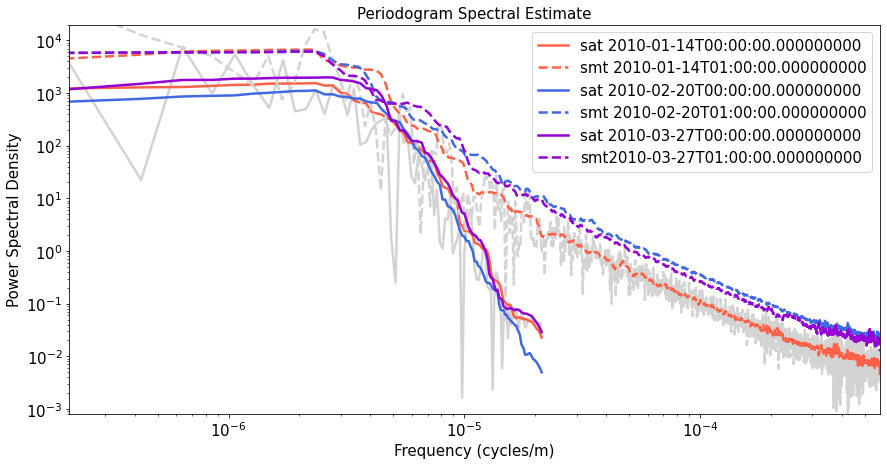

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

t1 = 13
t_sat = ds_section.time[t1].data
y = ds_section.isel(time=t1).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat {t_sat}')

t2 = 12*5 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey', linestyle='--')
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato', linestyle='--',  label=f'smt {t_smt}')


t_sat = ds_section.time[50].data
y = ds_section.isel(time=50).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',   label=f'sat {t_sat}')

t = 42*12 #20th of february no hour specified
t_smt = smt_sec.time[t].data
y = smt_sec.isel(time=t)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue', linestyle='--',  label=f'smt {t_smt}')

t1 = 85
t_sat = ds_section.time[t1].data
y = ds_section.isel(time=t1).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='darkviolet',  label=f'sat {t_sat}')

t2 = 12*77 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='darkviolet', linestyle='--', label=f'smt{t_smt}')
    
ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Frequency (cycles/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram Spectral Estimate',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_sla', bbox_inches='tight')

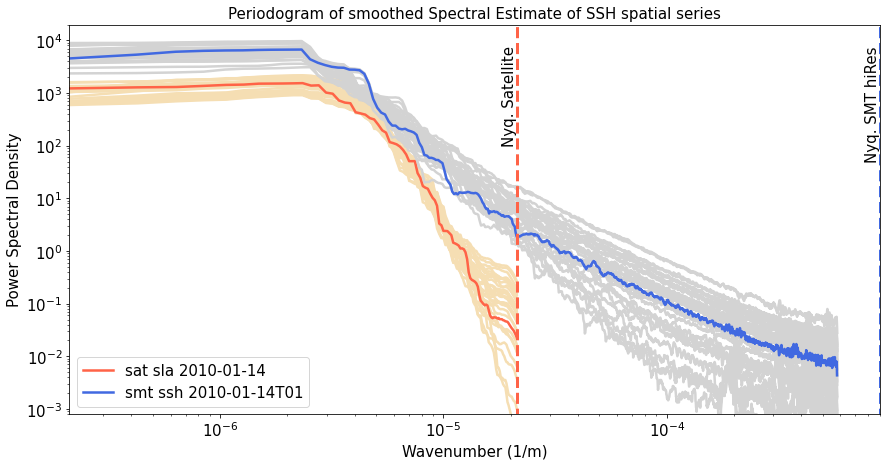

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5
###############################################################
# satellite
for ii in np.arange(90)[::3]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).sla
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')

t=13
t_sat = ds_section.time[t].data
y = ds_section.isel(time=t).sla
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat sla {t_sat:10.10}')

###########################################################
# smt
for ii in np.arange(984)[::30]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

t2 = 12*5 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh {t_smt:13.13}')

#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)



ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SSH spatial series',fontsize=15);
#plt.savefig('../images/fft_ssh_spat_sat_smt_sla_r', bbox_inches='tight')

In [73]:
984/3

328.0

robust mean after fft:


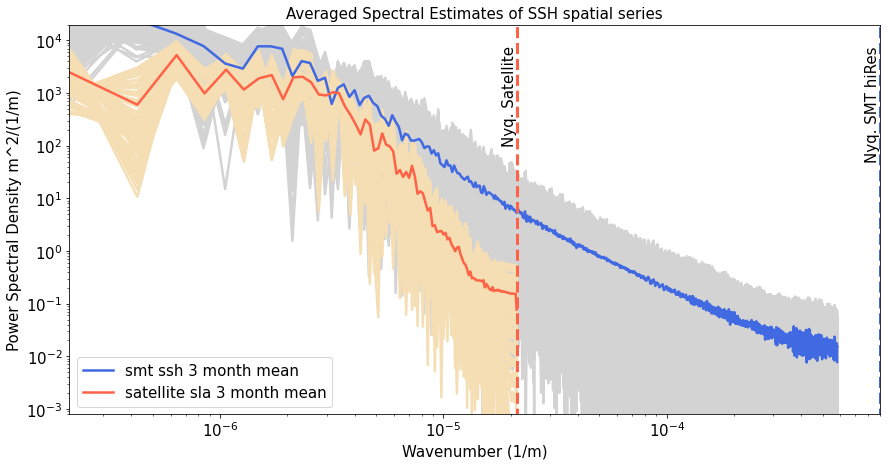

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
iii = 0
A_smt = np.zeros((328,2751)) #33 & 3
for ii in np.arange(984)[::3]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
iii = 0
A_sat = np.zeros((90,101))
for ii in np.arange(90)[::1]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).sla
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')


    
# smt average 3 month
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = np.mean(A_smt, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh 3 month mean')

# satelite sla average 3 month
y = ds_section.isel(time=ii).sla
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = np.mean(A_sat, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'satellite sla 3 month mean')  

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_sla_Robust', bbox_inches='tight')

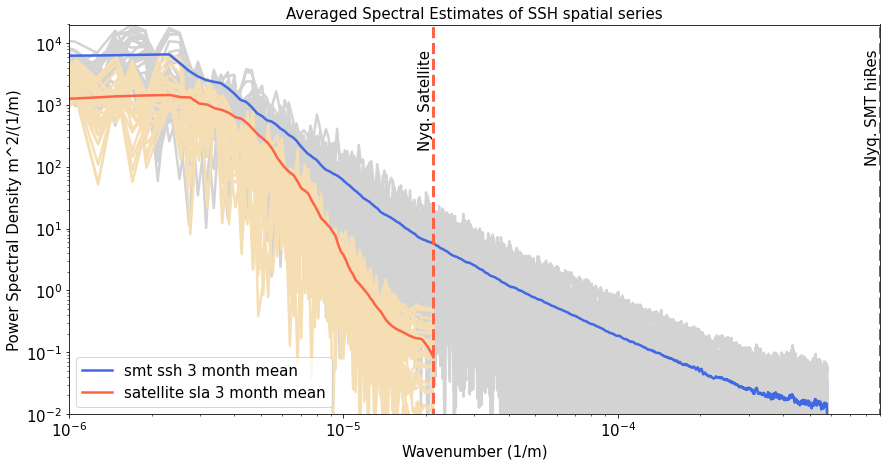

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
iii = 0
A_smt = np.zeros((33,2751))
for ii in np.arange(984)[::30]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
iii = 0
A_sat = np.zeros((30,101))
for ii in np.arange(90)[::3]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).sla
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')


    
# smt average 3 month
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = np.mean(A_smt, axis=0)
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh 3 month mean')

# satelite sla average 3 month
y = ds_section.isel(time=ii).sla
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = np.mean(A_sat, axis=0)
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'satellite sla 3 month mean')  

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 2e4)
#ax.autoscale(enable=True, tight=True)
xlim = ax.get_xlim()
ax.set_xlim(1e-6, xlim[1])
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_sla_robust_smoothed', bbox_inches='tight')

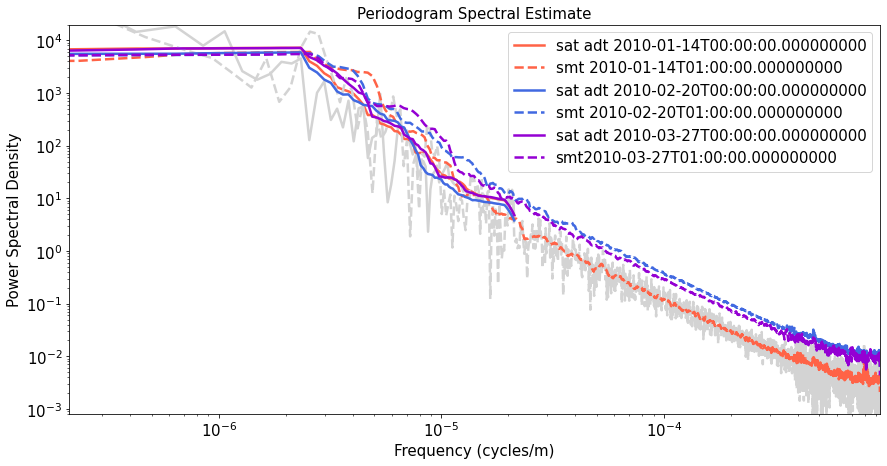

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

t1 = 13
t_sat = ds_section.time[t1].data
y = ds_section.isel(time=t1).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat adt {t_sat}')

t2 = 12*5 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey', linestyle='--')
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato', linestyle='--',  label=f'smt {t_smt}')


t_sat = ds_section.time[50].data
y = ds_section.isel(time=50).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',   label=f'sat adt {t_sat}')

t = 42*12 #20th of february no hour specified
t_smt = smt_sec.time[t].data
y = smt_sec.isel(time=t)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue', linestyle='--',  label=f'smt {t_smt}')

t1 = 85
t_sat = ds_section.time[t1].data
y = ds_section.isel(time=t1).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='darkviolet',  label=f'sat adt {t_sat}')

t2 = 12*77 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='darkviolet', linestyle='--', label=f'smt{t_smt}')
    
ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15)
ax.tick_params(labelsize=15)
plt.xlabel('Frequency (cycles/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram Spectral Estimate',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_adt', bbox_inches='tight')

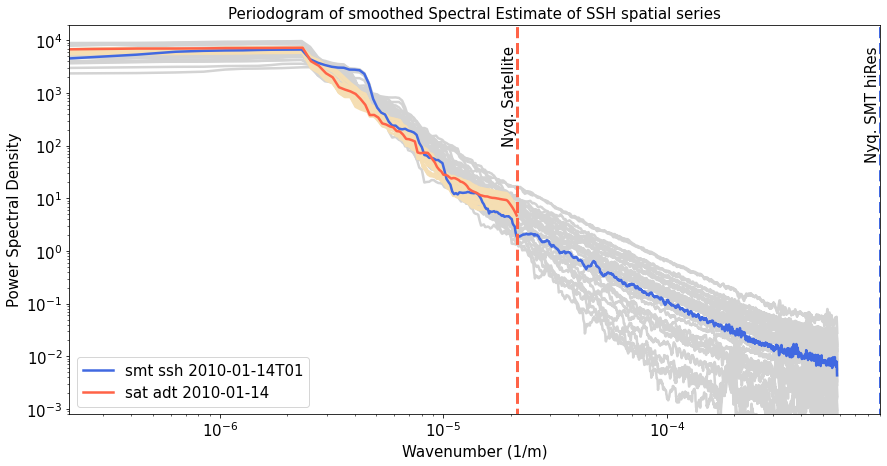

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
for ii in np.arange(984)[::30]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
for ii in np.arange(90)[::3]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).adt
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')
    
t2 = 12*5 #20th of february no hour specified
t_smt = smt_sec.time[t2].data
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh {t_smt:13.13}')

t=13
t_sat = ds_section.time[t].data
y = ds_section.isel(time=t).adt
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat adt {t_sat:10.10}')



#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_adt_r', bbox_inches='tight')

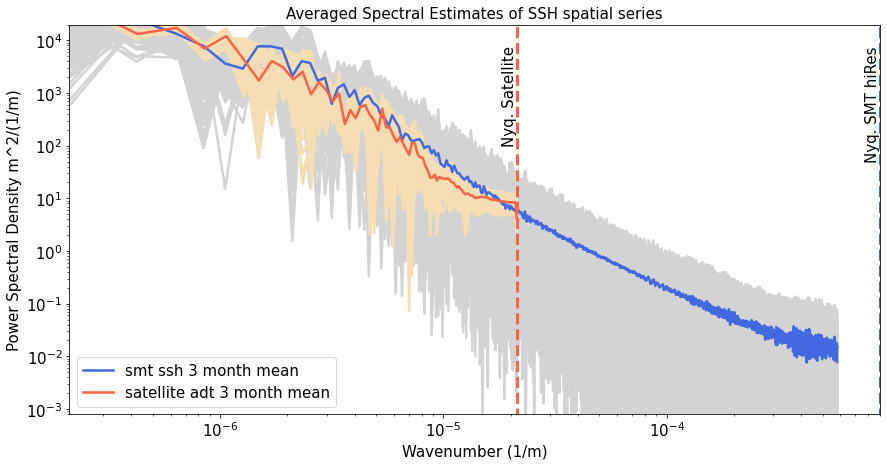

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
iii = 0
A_smt = np.zeros((328,2751))
for ii in np.arange(984)[::3]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
iii = 0
A_sat = np.zeros((90,101))
for ii in np.arange(90)[::1]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).adt
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')


    
# smt average 3 month
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = np.mean(A_smt, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh 3 month mean')

# satelite adt average 3 month
y = ds_section.isel(time=ii).adt
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = np.mean(A_sat, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'satellite adt 3 month mean')  

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_adt_Robust', bbox_inches='tight')

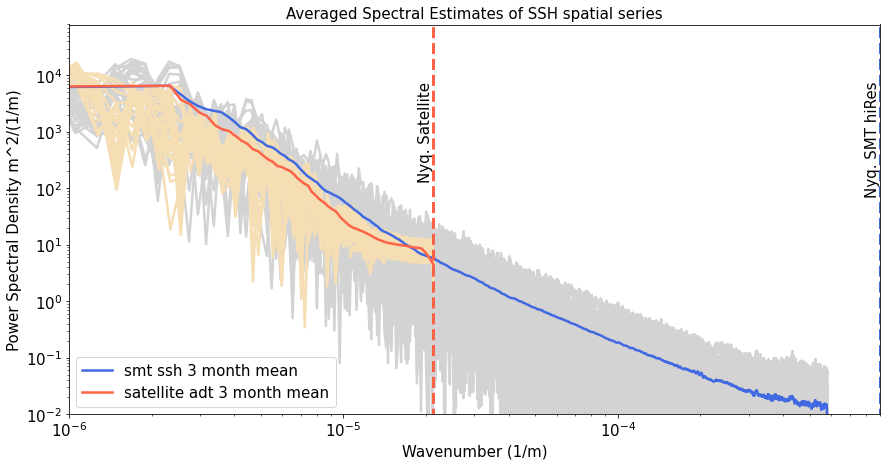

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
iii = 0
A_smt = np.zeros((33,2751))
for ii in np.arange(984)[::30]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
iii = 0
A_sat = np.zeros((30,101))
for ii in np.arange(90)[::3]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).adt
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')


    
# smt average 3 month
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = np.mean(A_smt, axis=0)
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh 3 month mean')

# satelite adt average 3 month
y = ds_section.isel(time=ii).adt
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = np.mean(A_sat, axis=0)
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'satellite adt 3 month mean')  

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-2, 8e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
xlim = ax.get_xlim()
ax.set_xlim(1e-6, xlim[1])
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_adt_robust_smoothed', bbox_inches='tight')

# temporal ssh analysis

In [82]:
#cluster
import datetime
import multiprocessing
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths

In [83]:
## Start cluster

!echo $HOSTNAME

mlogin104


In [84]:
# Set some user specific variables
account_name = 'mh0033' # Account that is going to be 'charged' fore the computation
queue = 'gpu' # Name of the partition we want to use
job_name = 'PostProc' # Job name that is submitted via sbatch
memory = "200GiB" # Max memory per node that is going to be used - this depends on the partition
cores = 24 # Max number of cores per task that are reserved - also partition dependend
walltime = '8:00:00' # Walltime - also partition dependent

In [85]:
scratch_dir = Path('/scratch') / getuser()[0] / getuser() # Define the users scratch dir
# Create a temp directory where the output of distributed cluster will be written to, after this notebook
# is closed the temp directory will be closed
dask_tmp_dir = TemporaryDirectory(dir=scratch_dir, prefix=job_name)
cluster = SLURMCluster(memory=memory,
                       cores=cores,
                       project=account_name,
                       walltime=walltime,
                       queue=queue,
                       name=job_name,
                       scheduler_options={'dashboard_address': ':8989'},
                       local_directory=dask_tmp_dir.name,
                       job_extra=[f'-J {job_name}', 
                                  f'-D {dask_tmp_dir.name}',
                                  f'--begin=now',
                                  f'--output={dask_tmp_dir.name}/LOG_cluster.%j.o',
                                  f'--output={dask_tmp_dir.name}/LOG_cluster.%j.o'
                                 ],
                       interface='ib0')

In [86]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p gpu
#SBATCH -A mh0033
#SBATCH -n 1
#SBATCH --cpus-per-task=24
#SBATCH --mem=200G
#SBATCH -t 8:00:00
#SBATCH -J PostProc
#SBATCH -D /scratch/u/u241317/PostProczo1m0l7o
#SBATCH --begin=now
#SBATCH --output=/scratch/u/u241317/PostProczo1m0l7o/LOG_cluster.%j.o
#SBATCH --output=/scratch/u/u241317/PostProczo1m0l7o/LOG_cluster.%j.o

/work/mh0033/u241317/miniconda3/envs/pyicon_py38/bin/python -m distributed.cli.dask_worker tcp://10.50.32.33:46670 --nthreads 4 --nprocs 6 --memory-limit 33.33GiB --name dummy-name --nanny --death-timeout 60 --local-directory /scratch/u/u241317/PostProczo1m0l7o --interface ib0 --protocol tcp://



In [87]:
cluster.scale(jobs=2)
cluster

In [88]:
! squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          34637658       gpu PostProc  u241317 PD       0:00      1 (None)
          34637659       gpu PostProc  u241317 PD       0:00      1 (None)


In [89]:
client = Client(cluster)
client

<Client: 'tcp://10.50.32.33:46670' processes=0 threads=0, memory=0 B>

In [90]:
%%time
ds_section_comp = ds_section.adt.compute()

CPU times: user 34.4 s, sys: 23.1 s, total: 57.5 s
Wall time: 52.3 s


In [91]:
%%time
smt_sec_comp = smt_sec.compute()

CPU times: user 1min 29s, sys: 51.9 s, total: 2min 21s
Wall time: 2min


In [71]:
def corfreq(lat):
    """
    The Coriolis frequency in rad / day at a given latitude.
    
    Args: 
        lat: Latitude in degree
        
    Returns:
        The Coriolis frequecy at latitude lat
    """    
    omega=7.2921159e-5;
    return 2*np.sin(lat*2*np.pi/360)*omega*(3600)*24;

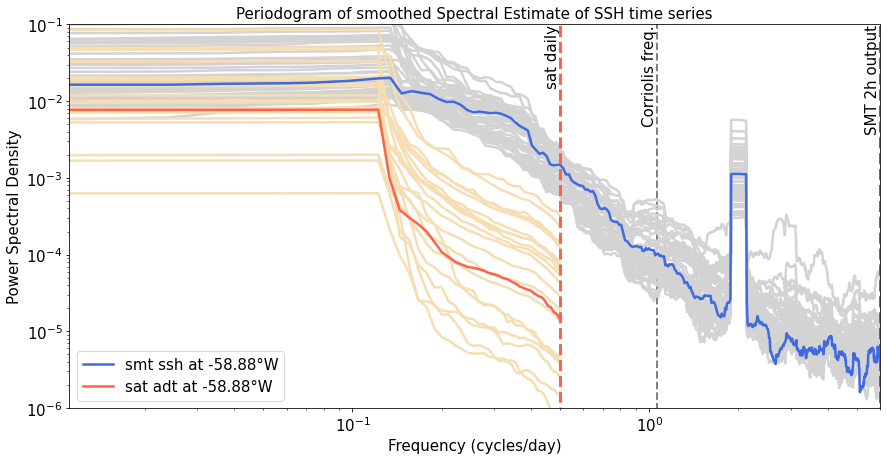

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
dt_smt = 2/24
for ii in np.arange(5500)[::100]:
    y = smt_sec_comp.isel(ncells=ii)
    cv = y.data
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_smt)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
dt_sat = 24/24
for ii in np.arange(200)[::10]:
    y = ds_section_comp.isel(longitude=ii)
    y = y.squeeze()
    cv = y.data
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_sat)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')
    

loc_smt = smt_sec.clon[3145].data    
y = smt_sec_comp.isel(ncells=3145)
cv = y.data 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh at {loc_smt:.2f}°W')


loc_sat = ds_section.longitude[84].data
y = ds_section_comp.isel(longitude=84)
y = y.squeeze()
# satellite
cv = y.data #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat adt at {loc_sat:.2f}°W')


#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*dt_smt)
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*dt_smt), 1e-1, 'SMT 2h output', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dt_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dt_sat), 1e-1, 'sat daily', ha='right', va='top',rotation='vertical', fontsize=15)

ax.vlines(corfreq(31.9)/2/np.pi,ax.get_ylim()[0],ax.get_ylim()[1],linestyle="--", color="gray",linewidth=2)
ax.text(corfreq(31.9)/2/np.pi, 1e-1, 'Corriolis freq.', ha='right', va='top',rotation='vertical', fontsize=15)



ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-6, 1e-1)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Frequency (cycles/day)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SSH time series',fontsize=15);
plt.savefig('../images/fft_ssh_time_sat_smt_adt_r', bbox_inches='tight')

espacially in satellite data the power spectral density seems to depend on longitude - it looks random if colormap is adapted to longitude

In [ ]:
color = iter(cm.rainbow(np.linspace(0, 1, n)))
for i in range(n):
   c = next(color)
   plt.plot(x, y, c=c)

In [114]:
from matplotlib.pyplot import cm

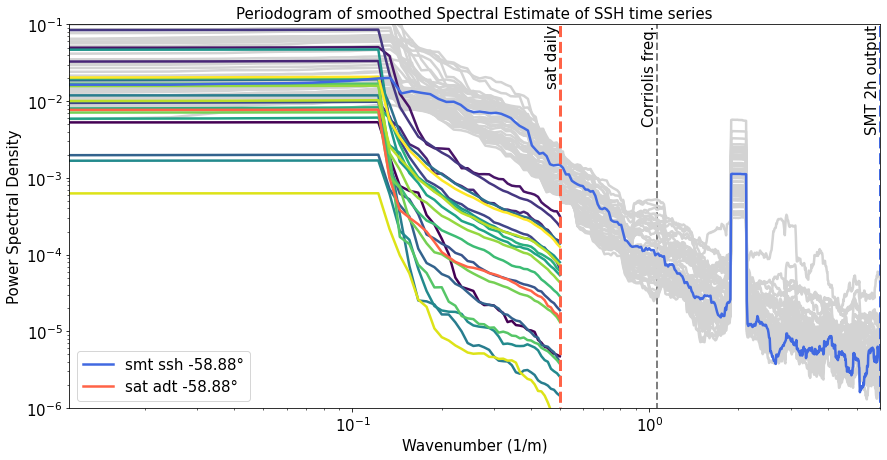

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
dt_smt = 2/24
for ii in np.arange(5500)[::100]:
    y = smt_sec_comp.isel(ncells=ii)
    cv = y.data
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_smt)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
color = iter(cm.viridis(np.linspace(0, 1, 20)))
dt_sat = 24/24
for ii in np.arange(200)[::10]:
    c = next(color)
    y = ds_section_comp.isel(longitude=ii)
    y = y.squeeze()
    cv = y.data
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_sat)
    S = S.squeeze()
    S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color=c)
    

loc_smt = smt_sec.clon[3145].data    
y = smt_sec_comp.isel(ncells=3145)
cv = y.data 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_smt)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh {loc_smt:.2f}°')


loc_sat = ds_section.longitude[84].data
y = ds_section_comp.isel(longitude=84)
y = y.squeeze()
# satellite
cv = y.data #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat adt {loc_sat:.2f}°')


#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*dt_smt)
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*dt_smt), 1e-1, 'SMT 2h output', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dt_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dt_sat), 1e-1, 'sat daily', ha='right', va='top',rotation='vertical', fontsize=15)

ax.vlines(corfreq(31.9)/2/np.pi,ax.get_ylim()[0],ax.get_ylim()[1],linestyle="--", color="gray",linewidth=2)
ax.text(corfreq(31.9)/2/np.pi, 1e-1, 'Corriolis freq.', ha='right', va='top',rotation='vertical', fontsize=15)



ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-6, 1e-1)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density',fontsize=15)
plt.title('Periodogram of smoothed Spectral Estimate of SSH time series',fontsize=15);
plt.savefig('../images/fft_ssh_time_sat_smt_adt_r', bbox_inches='tight')

In [111]:
y = ds_section.longitude[83]
y = y.squeeze()
y

<xarray.DataArray 'longitude' ()>
array(-59.125, dtype=float32)
Coordinates:
    longitude  float32 -59.12

In [80]:
y = ds_section.isel(longitude=100).adt
y = y.squeeze()
# satellite
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dt_sat)
S = S.squeeze()
S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'sat adt {t_sat:10.10}')



KeyboardInterrupt: 